Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Samratsinh Dhumal"
COLLABORATORS = ""

---

# Calculate over all grade

The file `grades_anon.csv` contains grades for some class. In this homework you are to calculate the overall grade for each student then return the pandas describe matrix. 

The four homework combined account for 40% of the overall grades and lab1 counts for 30% of the overall grade. The remaining 30% of the grades have not yet been determined.

I have given the solution. It is completely up to you to figure how to to parse the csv file to get the describe dataframe I am looking for.

In the decribe matrix:
The `hw_scaled` column is the stats associated with `sum(Homework[1:4])*0.25`

The `overall` column is the stats associated with `hw_scaled*0.4 + LAB1*0.3`

Each of the homework columns is the stats associated with `round(grade/max_score * 100)` for each homework. 

In [2]:
import pandas as pd
# Part 1 (20 points)
"""
Return the describe frame from pandas that looks like this. Reverse engineer it!

FYI, I could not use Pickle due to Jupyter limitation. 
"""
expected_solution = pd.read_csv('grades_describe.csv')
expected_solution = expected_solution.set_index('Unnamed: 0')
del expected_solution.index.name

expected_solution

,Homework1,Homework2,Homework3,Homework4,Lab1,hw_scaled,overall
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,90.487395,95.563025,93.756303,85.436975,86.823529,91.310924,89.387755
std,16.909463,16.324900,21.680643,20.733841,26.711150,15.679725,18.881177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,100.000000,100.000000,85.000000,94.500000,93.125000,85.785714
50%,93.000000,100.000000,100.000000,91.000000,100.000000,96.000000,97.428571
75%,100.000000,100.000000,100.000000,98.000000,100.000000,97.750000,98.642857
max,100.000000,100.000000,100.000000,104.000000,100.000000,101.000000,100.571429


In [3]:
def calculate_grades_pandas_describe_frame():
    """
    Return the describe data frame associated with the class grades. Use the grades_anon.csv.
    """
    
    # YOUR CODE HERE
    grades_anon = pd.read_csv('grades_anon.csv')
    grades_anon_new=grades_anon.pivot_table(index="student_id", columns='assignment')['score']
    grades_anon_new=grades_anon_new.reset_index()
    hw_list=['Homework1','Homework2','Homework3','Homework4','Lab1']

    for z in enumerate(hw_list): 
        hw_max=grades_anon_new[z[1]].max()
        if(z[1]=='Homework4'):
            grades_anon_new[z[1]]=round((grades_anon_new[z[1]]/hw_max)*104)
        else:
            grades_anon_new[z[1]]=round((grades_anon_new[z[1]]/hw_max)*100)
    grades_anon_new['hw_scaled'] = 0.25*(grades_anon_new['Homework1']+grades_anon_new['Homework2']+grades_anon_new['Homework3']+grades_anon_new['Homework4'])
    grades_anon_new['overall']= (grades_anon_new['hw_scaled']*(0.4/0.7) + grades_anon_new['Lab1']*(0.3/0.7))
    return(grades_anon_new.describe())
#grades_anon_new
#    raise NotImplementedError()

In [7]:
expected_solution = pd.read_csv('grades_describe.csv')
expected_solution = expected_solution.set_index('Unnamed: 0')
del expected_solution.index.name

describe = calculate_grades_pandas_describe_frame()
describe.to_csv('test.csv')
solution = pd.read_csv('test.csv')
solution = solution.set_index('Unnamed: 0')
del solution.index.name
assert pd.DataFrame.equals(expected_solution.round(), solution.round()) == True


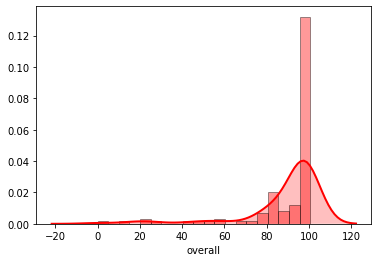

In [6]:
# Part 2 (No points!) -- Plot histogram using Seaborn


# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt
grades_anon = pd.read_csv('grades_anon.csv')
grades_anon_new=grades_anon.pivot_table(index="student_id", columns='assignment')['score']
grades_anon_new=grades_anon_new.reset_index()
hw_list=['Homework1','Homework2','Homework3','Homework4','Lab1']

for z in enumerate(hw_list): 
    hw_max=grades_anon_new[z[1]].max()
    if(z[1]=='Homework4'):
        grades_anon_new[z[1]]=round((grades_anon_new[z[1]]/hw_max)*104)
    else:
        grades_anon_new[z[1]]=round((grades_anon_new[z[1]]/hw_max)*100)
    grades_anon_new['hw_scaled'] = 0.25*(grades_anon_new['Homework1']+grades_anon_new['Homework2']+grades_anon_new['Homework3']+grades_anon_new['Homework4'])
    grades_anon_new['overall']= (grades_anon_new['hw_scaled']*(0.4/0.7) + grades_anon_new['Lab1']*(0.3/0.7))
    
sns.distplot(grades_anon_new['overall'], hist=True, kde=True, color = 'red', kde_kws={'shade': True,'linewidth': 2}, hist_kws={'edgecolor':'black'})


#raise NotImplementedError()